# Bloomfilter Project

In this project, we construct a bloomfilter as was stated by the problem description.

## Installation and Use

We assume a linux kernel and bash is used.

Install using:

```
git clone --recurse-submodules https://github.com/zachross015/bloomfilter
cd bloomfilter
```

Submodules are necessary since we use a different random library than the
traditional c++ library. Once the project has been downloaded, run

```
mkdir build
cd build
cmake ..
cmake --build .
cd ..
```

To run the program then, simply run:

```
build/bloomfilter
```

The program requires 3 inputs: the size of the bloomfilter, the number of hash
functions used, and the path to the file containing all the commands used in the
file. The file containing the commands must contain the same commands as specified in the project description.

## Methods

For our methods, we use `sfold` hash function as defined [here](https://research.cs.vt.edu/AVresearch/hashing/strings.php). We modify the program in that, for each of the `sfold` methods, is adjusted provided a certain seed. We split this into two tests: using the seed to offset the initial value, and using the seed as a multiplier. We test our methods on the recommended values provided in the guidelines for the performance study.

### Initial Value Offset

For this test, each seed takes the values $i = 1, \dots, n$ where $n$ is the number of hashing functions. After computing the overall hash of a string $h$, this value is reduced to a value within the confines of the array $\bar h \leftarrow (h + seed) \bmod N$ where $N$ is the size of the bloom filter. The results are as follows.

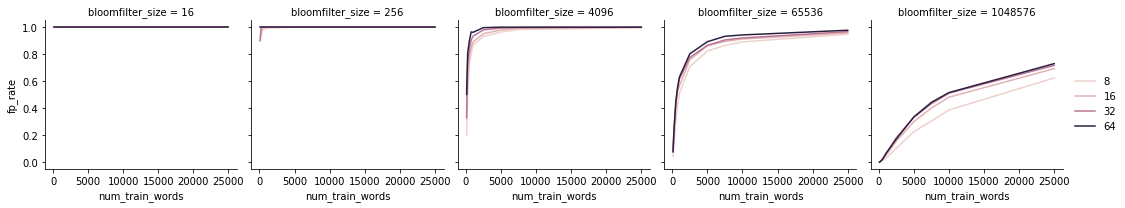

In [26]:
df = pd.read_csv('results2.csv', header=None).drop([4], axis=1).rename({0: 'bloomfilter_size', 1: 'num_hashs', 2: 'num_train_words', 3: 'fp_rate'}, axis=1)
g = sns.FacetGrid(df, col="bloomfilter_size")
g.map(sns.lineplot, "num_train_words", "fp_rate", 'num_hashs', alpha=1)
g.add_legend()
plt.show()

We note that we don't tend to see performance benefits until the bloomfilter is at the maximum reccomended size. 

### Multiplier

For this test, each seed is selected from a list of primes between 1 and 10,000. We do this so that each number is 1) relatively prime to all other seeds and 2) relatively prime to the size of the bloom filter. We also add 1 to the result. These methods are to satisfy the Hull/Dobell theorem for a linear congruential generator with a complete period, i.e. all values of the output are reachable. These seeds are selected randomly.

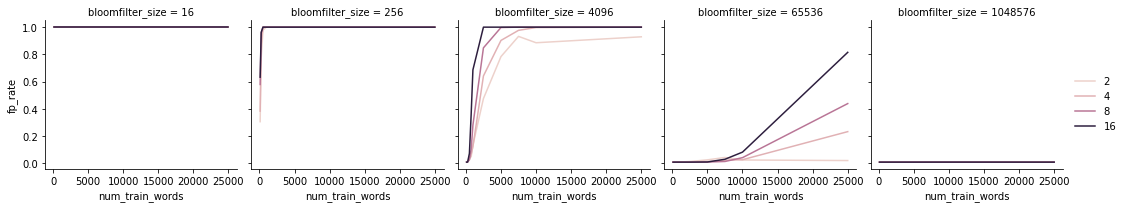

In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('results.csv')
g = sns.FacetGrid(df, col="bloomfilter_size")
g.map(sns.lineplot, "num_train_words", "fp_rate", 'num_hashs', alpha=1)
g.add_legend()
plt.show()